In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, MaxPooling1D, Conv1D, LSTM, Embedding
from tensorflow.keras.datasets import imdb   # 영화 리뷰 자료
from tensorflow.keras.preprocessing import sequence   # pad_sequences 활용하기 위해
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터 load -> 학습셋과 테스트셋으로 분리
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#  단어의 수를 맞춤  -> sequence.pad_sequences(데이터, 사이즈)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

(25000,) (25000,)
(25000,) (25000,)


In [5]:
# 모델 생성 -> LSTM만 적용
model = Sequential()   # 모델 선택
model.add(Embedding(5000, 100)) # 단어 임베딩
model.add(Dropout(0.5))   # 노드 꺼줌 ( 50 % )
model.add(Conv1D(64, 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(4))   # maxpooling -> 25%로 줄어듬
model.add(LSTM(55))   # node 수
model.add(Dense(1, activation='sigmoid'))

# 모델 실행 옵션 
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 학습 조기 중단점 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=200, validation_split=0.25,
                    callbacks=[early_stopping])

Epoch 1/200
469/469 [==============================] - 50s 103ms/step - loss: 0.3962 - accuracy: 0.8079 - val_loss: 0.2911 - val_accuracy: 0.8811
Epoch 2/200
469/469 [==============================] - 49s 104ms/step - loss: 0.2323 - accuracy: 0.9083 - val_loss: 0.2599 - val_accuracy: 0.8942
Epoch 3/200
469/469 [==============================] - 49s 105ms/step - loss: 0.1837 - accuracy: 0.9308 - val_loss: 0.2859 - val_accuracy: 0.8776
Epoch 4/200
469/469 [==============================] - 48s 103ms/step - loss: 0.1482 - accuracy: 0.9471 - val_loss: 0.2866 - val_accuracy: 0.8845
Epoch 5/200
469/469 [==============================] - 47s 101ms/step - loss: 0.1177 - accuracy: 0.9596 - val_loss: 0.2986 - val_accuracy: 0.8856


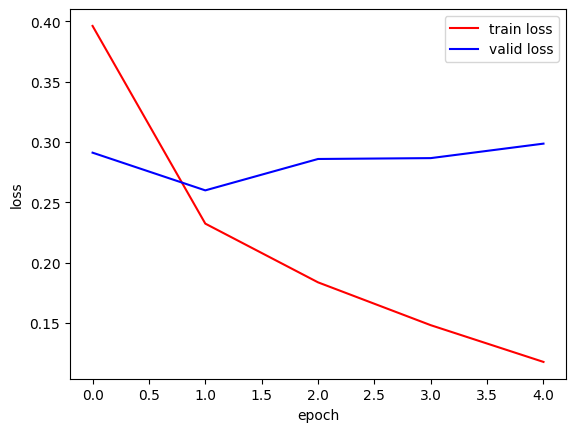

In [6]:
#  학습셋과 테스트셋의 오차를 그래프로 확인
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, c='red', label='train loss')
plt.plot(x_len, y_vloss, c='blue', label='valid loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
# Attention()을 추가한 모델로 실행 
# 모델 생성 -> LSTM만 적용
model = Sequential()
model.add(Embedding(5000, 500)) #  단어 임베딩
model.add(Conv1D(64, 4))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 모델 실행 옵션 
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 학습 조기 중단점 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=200, validation_split=0.25,
                    callbacks=[early_stopping])

Epoch 1/200
469/469 [==============================] - 104s 217ms/step - loss: 0.3825 - accuracy: 0.8157 - val_loss: 0.3442 - val_accuracy: 0.8453
Epoch 2/200
469/469 [==============================] - 99s 210ms/step - loss: 0.2157 - accuracy: 0.9170 - val_loss: 0.3213 - val_accuracy: 0.8715
Epoch 3/200
469/469 [==============================] - 103s 220ms/step - loss: 0.1486 - accuracy: 0.9459 - val_loss: 0.2905 - val_accuracy: 0.8877
Epoch 4/200
469/469 [==============================] - 102s 216ms/step - loss: 0.0932 - accuracy: 0.9679 - val_loss: 0.3656 - val_accuracy: 0.8709
Epoch 5/200
469/469 [==============================] - 95s 202ms/step - loss: 0.0737 - accuracy: 0.9730 - val_loss: 0.4330 - val_accuracy: 0.8763
Epoch 6/200
469/469 [==============================] - 95s 202ms/step - loss: 0.0420 - accuracy: 0.9863 - val_loss: 0.4904 - val_accuracy: 0.8774


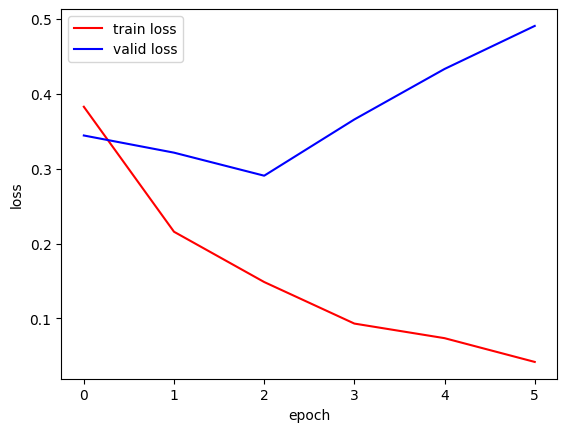

In [13]:
#  학습셋과 테스트셋의 오차를 그래프로 확인, 어텐션 추가한 모델의 손실함수 그래프
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, c='red', label='train loss')
plt.plot(x_len, y_vloss, c='blue', label='valid loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()